In [1]:
URL1 ='https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?accessType=DOWNLOAD'
URL = 'https://data.seattle.gov/api/views/3xqu-vnum/rows.csv?accessType=DOWNLOAD'
URL3='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
# URL3 51W data line 

In [2]:
from urllib.request import urlretrieve
# download csv file 
# this is america 2008 to now time crime sum data
urlretrieve(URL3,'Fremonts.csv')

('Fremonts.csv', <http.client.HTTPMessage at 0x496a9b0>)

In [3]:
# open a file
with open('Fremonts.csv') as f:
    for i in range(10):
        print(f.readline())


Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk

10/03/2012 12:00:00 AM,9,4

10/03/2012 01:00:00 AM,6,4

10/03/2012 02:00:00 AM,1,1

10/03/2012 03:00:00 AM,3,2

10/03/2012 04:00:00 AM,1,6

10/03/2012 05:00:00 AM,10,21

10/03/2012 06:00:00 AM,50,105

10/03/2012 07:00:00 AM,95,257

10/03/2012 08:00:00 AM,146,291



In [4]:
# or use pandas anslise the csv file
import pandas as pd
data = pd.read_csv('Fremonts.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


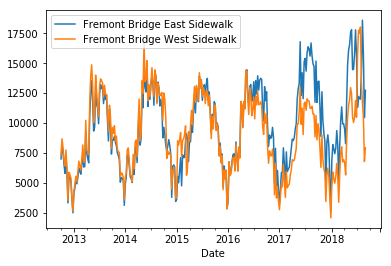

In [5]:
%matplotlib inline 
# data.plot()
data.resample('W').sum().plot()

## complax data anslise

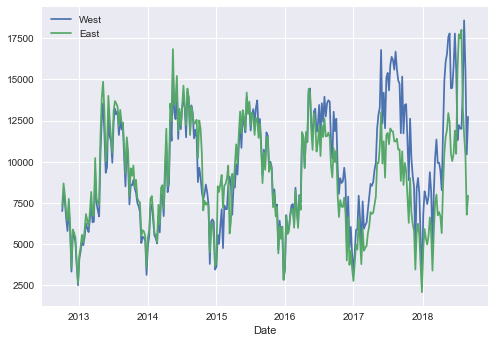

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns =['West','East']
data.resample('W').sum().plot()

(0, 1080850.45)

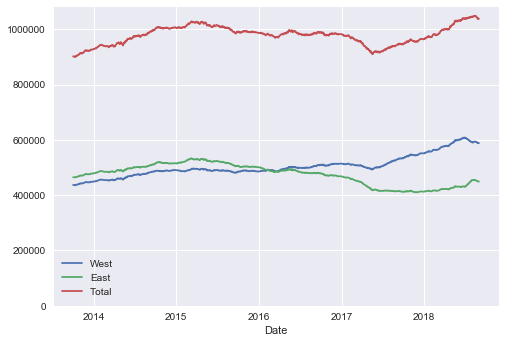

In [7]:
data['Total'] = data['West']+data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

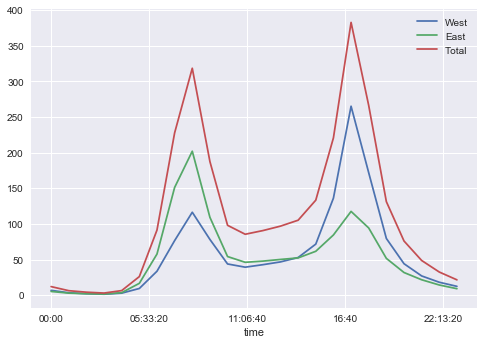

In [8]:
data.groupby(data.index.time).mean().plot()

In [11]:
# make table 
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5];

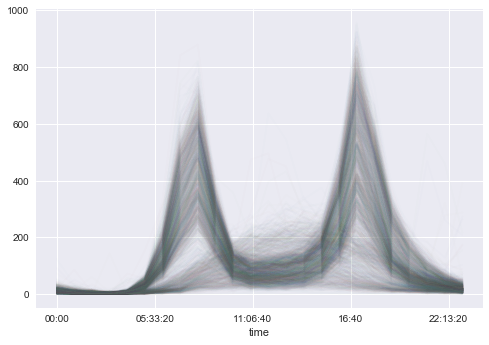

In [10]:
pivoted.plot(legend=False,alpha=0.01)
# this is unvalidate